This lab uses the [20 Newsgroups dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html?highlight=newsgroup#sklearn.datasets.fetch_20newsgroups)
directly available in Scikit-Learn. It comprises around 18,000 newsgroups posts spread across 20 different news classes.

    

# I, Kenny Barza, affirm that I completed this assignment on my own without receiving any help.

In [30]:
#Contraction map
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [31]:
# coding: utf-8

# Code adopted from Dipanjan Sarkar: 
# https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch07_Analyzing_Movie_Reviews_Sentiment/text_normalizer.py


# # Import necessary dependencies
import re
import nltk
import spacy
import string
import unicodedata
# from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
#Importing stemmers
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

stopword_list = nltk.corpus.stopwords.words('english') #Here we are removing stopwords
# wnl = WordNetLemmatizer()

# # Remove negation from NLTK stopword list (important in sentiment analysis)
# stopword_list.remove("won't")  
# ...

# # Default NLTK tokenizer
# # # Try other like ToktokTokenizer, ...
def tokenize_text(text):
    tokens = word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens
## This fucntion allows us to have a list of words.
 
# # Cleaning Text - strip HTML
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text
#Stripping html


# # Removing accented characters -> kelshi accent aa men shilon
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


# # Expanding Contractions -> I've we hal khbar. Hole jebneheon men l list li 3melneha.
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) \
                                   if contraction_mapping.get(match) \
                                    else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


"""Removing Special Characters
def remove_special_characters(text):
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    return text"""

# # Removing Special Characters 2
###An alternative way to try.
def remove_special_characters(text):
     tokens = tokenize_text(text)
     pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
     filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
     filtered_text = ' '.join(filtered_tokens)
     return filtered_text
 

# Lemmatizing text based on Spacy
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ for word in text])
    # text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

# Stemming text
def stemSentence_Porter(text):
    porter=PorterStemmer()
    token_words=word_tokenize(text)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

# # Removing Stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenize_text(text)
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


# # Normalize text corpus - tying it all together
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True,stemsentence=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    
    for doc in corpus:

        
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        
        if html_stripping:
            doc = strip_html_tags(doc)
                
        if text_lower_case:
            doc = doc.lower()
            
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        
        if contraction_expansion:
            doc = expand_contractions(doc)
        
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        if text_lemmatization:
            doc = lemmatize_text(doc)
            
        if stemsentence:
            doc= stemSentence_Porter(doc) 
        
        if special_char_removal:
            doc = re.sub(r'[0-9]+','', remove_special_characters(doc)) 
            
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)

   
    
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [32]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import warnings
import processing as pp  # local module
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [33]:
data = fetch_20newsgroups(subset='all', shuffle=True,
                          remove=('headers', 'footers', 'quotes'))
data_labels_map = dict(enumerate(data.target_names))

In [34]:
#Creating data frame of the each article in head and and the target label -> the topic
corpus, target_labels, target_names = (data.data, data.target, 
                                       [data_labels_map[label] for label in data.target])
data_df = pd.DataFrame({'Article': corpus, 'Target Label': target_labels,
'Target Name': target_names})

print(data_df.shape)
data_df.head(10)


(18846, 3)


Article  Target Label  \
0  \n\nI am sure some bashers of Pens fans are pr...            10   
1  My brother is in the market for a high-perform...             3   
2  \n\n\n\n\tFinally you said what you dream abou...            17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...             3   
4  1)    I have an old Jasmine drive which I cann...             4   
5  \n\nBack in high school I worked as a lab assi...            12   
6  \n\nAE is in Dallas...try 214/241-6060 or 214/...             4   
7  \n[stuff deleted]\n\nOk, here's the solution t...            10   
8  \n\n\nYeah, it's the second one.  And I believ...            10   
9  \nIf a Christian means someone who believes in...            19   

                Target Name  
0          rec.sport.hockey  
1  comp.sys.ibm.pc.hardware  
2     talk.politics.mideast  
3  comp.sys.ibm.pc.hardware  
4     comp.sys.mac.hardware  
5           sci.electronics  
6     comp.sys.mac.hardware  
7          rec.sport.hockey  
8          rec.sport.hockey  
9        talk.religion.misc

In [35]:
#Here we are checking the content of the first article
print(data_df.iloc[0])
print(data_df.iloc[0].Article)


Article         \n\nI am sure some bashers of Pens fans are pr...
Target Label                                                   10
Target Name                                      rec.sport.hockey
Name: 0, dtype: object


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




# Data Preprocessing and Normalization

In [36]:
# How many records are empty?
total_nulls = data_df[data_df.Article.str.strip() == ""].shape[0]

print("Total number of empty documents = {} out of {} documents".format(
            total_nulls, data_df.shape[0]))

Total number of empty documents = 515 out of 18846 documents


In [37]:
# Remove the empty records
data_df = data_df[~(data_df.Article.str.strip() == "")]
data_df.shape

(18331, 3)

------------------------------------

In [38]:
#Here we are applying the function we create. Here is where the fun begins
norm_corpus = normalize_corpus(corpus=data_df['Article'], html_stripping=True, contraction_expansion=False,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=False,stemsentence=False, special_char_removal=False, 
                     stopword_removal=True)
data_df['Clean Article'] = norm_corpus

In [352]:
data_df.head(10)



Article  Target Label  \
0  \n\nI am sure some bashers of Pens fans are pr...            10   
1  My brother is in the market for a high-perform...             3   
2  \n\n\n\n\tFinally you said what you dream abou...            17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...             3   
4  1)    I have an old Jasmine drive which I cann...             4   
5  \n\nBack in high school I worked as a lab assi...            12   
6  \n\nAE is in Dallas...try 214/241-6060 or 214/...             4   
7  \n[stuff deleted]\n\nOk, here's the solution t...            10   
8  \n\n\nYeah, it's the second one.  And I believ...            10   
9  \nIf a Christian means someone who believes in...            19   

                Target Name                                      Clean Article  
0          rec.sport.hockey  sure basher pen fan pretty confused lack kind ...  
1  comp.sys.ibm.pc.hardware  brother market high - performance video card s...  
2     talk.politics.mideast  finally say dream . mediterranean ? ? ? ? new ...  
3  comp.sys.ibm.pc.hardware  think ! 's scsi card dma transfer disk . . . s...  
4     comp.sys.mac.hardware  1 ) old jasmine drive use new system . underst...  
5           sci.electronics  back high school work lab assistant bunch expe...  
6     comp.sys.mac.hardware  ae dalla . . . try 214/241 - 6060 214/241 - 00...  
7          rec.sport.hockey  [ stuff delete ] ok , 's solution problem . mo...  
8          rec.sport.hockey  yeah , be second one . believe price . ' ve tr...  
9        talk.religion.misc  christian mean someone believe divinity jesus ...

### Data splitting 

In [412]:
#Splitting the data
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names = train_test_split(np.array(data_df['Clean Article']),
                                                                                                                     np.array(data_df['Target Label']),
                                                                                                                     np.array(data_df['Target Name']),
                                                                                                                     stratify=data_df['Target Label'],
                                                                                                                     test_size=0.30, random_state=42)
train_corpus.shape, test_corpus.shape
#print(train_corpus)

((12831,), (5500,))

# Building and Evaluating Our Text Classifier

We will use the following workflows to build our text classifiers.
- Traditional feature representation (BOW, TF-IDF) and classification models


# Bag of Words Features with Classification Models

Let’s start by using a basic Bag of Words, the term frequency-based feature engineering
model, to extract features from our train and test datasets.

In [413]:
# build BOW features on train articles
cv = CountVectorizer(min_df=0.0, max_df=1.0)
cv_train_features = cv.fit_transform(train_corpus)

# transform test articles into features
cv_test_features = cv.transform(test_corpus)

In [414]:
print('BOW model:> Train features shape:', cv_train_features.shape,' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (12831, 93579)  Test features shape: (5500, 93579)


We now build several classifiers on these features using the training data and test
their performance on the test dataset using all the classification models we discussed
earlier. We also check model accuracies using five-fold cross validation just to see if
the model performs consistently across the validation folds of data (we use this same
strategy to tune the models later)

In [415]:
# Naïve Bayes Classifier

mnb = MultinomialNB(alpha=1)
mnb.fit(cv_train_features, train_label_names)

mnb_bow_train_scores = mnb.score(cv_train_features, train_label_names)
print('train Accuracy:', mnb_bow_train_scores)

mnb_bow_test_scores = mnb.score(cv_test_features, test_label_names)
print('Test Accuracy:', mnb_bow_test_scores)

train Accuracy: 0.8203569480165225
Test Accuracy: 0.6876363636363636


# TF-IDF Features with Classification Models

We use TF-IDF features to train our classification models. Assuming TF-IDF weighs
down unimportant features, we might get better performing models. Let’s test our
assumption!

In [416]:

# build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
tv_train_features = tv.fit_transform(train_corpus)

# transform test articles into features
tv_test_features = tv.transform(test_corpus)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (12831, 93579)  Test features shape: (5500, 93579)


We now build several classifiers on these features using the training data and test
their performance on the test dataset using all the classification models. We also check
model accuracies using five-fold cross validation, just like we did earlier.

In [417]:
# Naïve Bayes
mnb = MultinomialNB(alpha=1)
mnb.fit(tv_train_features, train_label_names)

mnb_tfidf_train_scores = mnb.score(tv_train_features, train_label_names)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = mnb.score(tv_test_features, test_label_names)
print('Test Accuracy:', mnb_tfidf_test_scores)




Train Accuracy: 0.8766269191801107
Test Accuracy: 0.736


In [140]:
"""
TFtest=[]
TFtrain=[]
TFIFtest=[]
TFIFtrain=[]
""""""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-140-d1ab85c076cc>, line 6)

# We will see which preprocessing technique hace the best effect on the naive bayes model

In [383]:
# Addin to the list
TFtest.append(mnb_bow_test_scores)
TFtrain.append(mnb_bow_train_scores)
TFIFtest.append(mnb_tfidf_test_scores)
TFIFtrain.append(mnb_tfidf_train_scores)

In [384]:
TFtest

[0.6247272727272727,
 0.6305454545454545,
 0.6203636363636363,
 0.6870909090909091,
 0.6809090909090909,
 0.6870909090909091,
 0.6832727272727273,
 0.6876363636363636,
 0.6849090909090909,
 0.6787272727272727,
 0.6830909090909091,
 0.6876363636363636,
 0.6876363636363636,
 0.6863636363636364]

In [385]:
TFtrain

[0.7684514067492791,
 0.7716467929233887,
 0.7638531681084872,
 0.8182526693164991,
 0.8166939443535188,
 0.8182526693164991,
 0.8191099680461382,
 0.8203569480165225,
 0.8205128205128205,
 0.7926116436754734,
 0.7986127347829476,
 0.7996259060088847,
 0.7996259060088847,
 0.7999376510014808]

In [386]:
TFIFtest

[0.6876363636363636,
 0.6869090909090909,
 0.6827272727272727,
 0.7356363636363636,
 0.7303636363636363,
 0.7356363636363636,
 0.7305454545454545,
 0.736,
 0.7287272727272728,
 0.7283636363636363,
 0.7314545454545455,
 0.7314545454545455,
 0.7276363636363636,
 0.732]

In [387]:
TFIFtrain

[0.8273712103499338,
 0.8283064453277219,
 0.8250331229054634,
 0.8762372379393656,
 0.8750681942171303,
 0.8762372379393656,
 0.8755358117060245,
 0.8766269191801107,
 0.8755358117060245,
 0.8544150884576417,
 0.8600264983243706,
 0.8600264983243706,
 0.8573766658873042,
 0.8607279245577117]

# Changing Orders after we chose the best Preprocessing techniques

In [260]:
"""TFtest1=[]
TFtrain1=[]
TFIFtest1=[]
TFIFtrain1=[]"""

In [418]:
#Adding to the list
TFtest1.append(mnb_bow_test_scores)
TFtrain1.append(mnb_bow_train_scores)
TFIFtest1.append(mnb_tfidf_test_scores)
TFIFtrain1.append(mnb_tfidf_train_scores)

In [419]:
TFtest1

[0.6876363636363636,
 0.6821818181818182,
 0.6821818181818182,
 0.6876363636363636,
 0.6876363636363636,
 0.6876363636363636]

In [420]:
TFtrain1

[0.8203569480165225,
 0.8134206219312602,
 0.8134206219312602,
 0.8203569480165225,
 0.8203569480165225,
 0.8203569480165225]

In [421]:
TFIFtest1

[0.736, 0.7310909090909091, 0.7310909090909091, 0.736, 0.736, 0.736]

In [422]:
TFIFtrain1

[0.8766269191801107,
 0.8729639155171071,
 0.8729639155171071,
 0.8766269191801107,
 0.8766269191801107,
 0.8766269191801107]

We can now do a nice comparison of all the models we have tried so far with the two
different feature engineering techniques. We will build a dataframe from our modeling
results and compare the results. 

## After choosing the best Preprocessing, we will move on the test the which n_gram range is the better


In [11]:
#Data Splitting
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names = train_test_split(np.array(data_df['Clean Article']),
                                                                                                                     np.array(data_df['Target Label']),
                                                                                                                     np.array(data_df['Target Name']),
                                                                                                                     stratify=data_df['Target Label'],
                                                                                                                     test_size=0.30, random_state=42)
train_corpus.shape, test_corpus.shape
#print(train_corpus)

((12831,), (5500,))

In [424]:
# build BOW features on train articles with 3-gram
cv = CountVectorizer(min_df=0.0, max_df=1.0,ngram_range=(3, 3))
cv_train_features = cv.fit_transform(train_corpus)

# transform test articles into features
cv_test_features = cv.transform(test_corpus)

In [425]:
print('BOW model:> Train features shape:', cv_train_features.shape,' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (12831, 1201632)  Test features shape: (5500, 1201632)


In [426]:
# Naïve Bayes Classifier

mnb = MultinomialNB(alpha=1)
mnb.fit(cv_train_features, train_label_names)

mnb_bow_train_scores = mnb.score(cv_train_features, train_label_names)
print('train Accuracy:', mnb_bow_train_scores)

mnb_bow_test_scores = mnb.score(cv_test_features, test_label_names)
print('Test Accuracy:', mnb_bow_test_scores)

train Accuracy: 0.989010989010989
Test Accuracy: 0.41654545454545455


In [427]:
# Support Vector Machines

svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(cv_train_features, train_label_names)

svm_bow_train_scores = svm.score(cv_train_features, train_label_names)
print('Train Accuracy:', svm_bow_train_scores)

svm_bow_test_scores = svm.score(cv_test_features, test_label_names)
print('Test Accuracy:', svm_bow_test_scores)

Train Accuracy: 0.9905697139739693
Test Accuracy: 0.32781818181818184


In [428]:

# build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(3, 3))
tv_train_features = tv.fit_transform(train_corpus)

# transform test articles into features
tv_test_features = tv.transform(test_corpus)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (12831, 1201632)  Test features shape: (5500, 1201632)


In [429]:
# Naïve Bayes
mnb = MultinomialNB(alpha=1)
mnb.fit(tv_train_features, train_label_names)

mnb_tfidf_train_scores = mnb.score(tv_train_features, train_label_names)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = mnb.score(tv_test_features, test_label_names)
print('Test Accuracy:', mnb_tfidf_test_scores)

Train Accuracy: 0.9888551165146909
Test Accuracy: 0.3956363636363636


In [430]:
# Support Vector Machines
svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(tv_train_features, train_label_names)

svm_tfidf_train_scores = svm.score(tv_train_features, train_label_names)
print('Train Accuracy:', svm_tfidf_train_scores)

svm_tfidf_test_scores = svm.score(tv_test_features, test_label_names)
print('Test Accuracy:', svm_tfidf_test_scores)

Train Accuracy: 0.9905697139739693
Test Accuracy: 0.4161818181818182


In [431]:
##(3,3)
pd.DataFrame([['Naive Bayes', mnb_bow_train_scores, mnb_bow_test_scores,
               mnb_tfidf_train_scores, mnb_tfidf_test_scores],
              ['Linear SVM', svm_bow_train_scores, svm_bow_test_scores,
               svm_tfidf_train_scores, svm_tfidf_test_scores]
              ],
             columns=['Model', 'Train Score (TF)', 'Test Score (TF)','Train Score (TF-IDF)', 'Test Score (TF-IDF)'],).T
#It did better on the TF-IDF So i will stick with it probably

0           1
Model                 Naive Bayes  Linear SVM
Train Score (TF)         0.989011     0.99057
Test Score (TF)          0.416545    0.327818
Train Score (TF-IDF)     0.988855     0.99057
Test Score (TF-IDF)      0.395636    0.416182

In [14]:
# build BOW features on train articles
cv = CountVectorizer(min_df=0.0, max_df=1.0,ngram_range=(2, 2))
cv_train_features = cv.fit_transform(train_corpus)

# transform test articles into features
cv_test_features = cv.transform(test_corpus)

In [16]:
# Naïve Bayes Classifier

mnb = MultinomialNB(alpha=1)
mnb.fit(cv_train_features, train_label_names)

mnb_bow_train_scores = mnb.score(cv_train_features, train_label_names)
print('train Accuracy:', mnb_bow_train_scores)

mnb_bow_test_scores = mnb.score(cv_test_features, test_label_names)
print('Test Accuracy:', mnb_bow_test_scores)

train Accuracy: 0.9909593952147143
Test Accuracy: 0.637090909090909


In [17]:
# Support Vector Machines

svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(cv_train_features, train_label_names)

svm_bow_train_scores = svm.score(cv_train_features, train_label_names)
print('Train Accuracy:', svm_bow_train_scores)

svm_bow_test_scores = svm.score(cv_test_features, test_label_names)
print('Test Accuracy:', svm_bow_test_scores)

Train Accuracy: 0.9950120801184631
Test Accuracy: 0.5309090909090909


In [24]:

# build BOW features on train articles with 2-gram
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(2, 2))
tv_train_features = tv.fit_transform(train_corpus)

# transform test articles into features
tv_test_features = tv.transform(test_corpus)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (12831, 944300)  Test features shape: (5500, 944300)


In [25]:
# Naïve Bayes
mnb = MultinomialNB(alpha=1)
mnb.fit(tv_train_features, train_label_names)

mnb_tfidf_train_scores = mnb.score(tv_train_features, train_label_names)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = mnb.score(tv_test_features, test_label_names)
print('Test Accuracy:', mnb_tfidf_test_scores)

Train Accuracy: 0.9929857376665887
Test Accuracy: 0.6098181818181818


In [26]:
# Support Vector Machines
svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(tv_train_features, train_label_names)

svm_tfidf_train_scores = svm.score(tv_train_features, train_label_names)
print('Train Accuracy:', svm_tfidf_train_scores)

svm_tfidf_test_scores = svm.score(tv_test_features, test_label_names)
print('Test Accuracy:', svm_tfidf_test_scores)

Train Accuracy: 0.9948562076221651
Test Accuracy: 0.6438181818181818


In [27]:
##(2,2)
pd.DataFrame([['Naive Bayes', mnb_bow_train_scores, mnb_bow_test_scores,
               mnb_tfidf_train_scores, mnb_tfidf_test_scores],
              ['Linear SVM', svm_bow_train_scores, svm_bow_test_scores,
               svm_tfidf_train_scores, svm_tfidf_test_scores]
              ],
             columns=['Model', 'Train Score (TF)', 'Test Score (TF)','Train Score (TF-IDF)', 'Test Score (TF-IDF)'],).T
#It did better on the TF-IDF So i will stick with it probably

0           1
Model                 Naive Bayes  Linear SVM
Train Score (TF)         0.990959    0.995012
Test Score (TF)          0.637091    0.530909
Train Score (TF-IDF)     0.992986    0.994856
Test Score (TF-IDF)      0.609818    0.643818

TFIDF model:> Train features shape: (12831, 10000)  Test features shape: (5500, 10000)
TFIDF model:> Train features shape: (12831, 20000)  Test features shape: (5500, 20000)
TFIDF model:> Train features shape: (12831, 30000)  Test features shape: (5500, 30000)
TFIDF model:> Train features shape: (12831, 40000)  Test features shape: (5500, 40000)
TFIDF model:> Train features shape: (12831, 50000)  Test features shape: (5500, 50000)
TFIDF model:> Train features shape: (12831, 100000)  Test features shape: (5500, 100000)
TFIDF model:> Train features shape: (12831, 150000)  Test features shape: (5500, 150000)
TFIDF model:> Train features shape: (12831, 200000)  Test features shape: (5500, 200000)
TFIDF model:> Train features shape: (12831, 250000)  Test features shape: (5500, 250000)
TFIDF model:> Train features shape: (12831, 300000)  Test features shape: (5500, 300000)


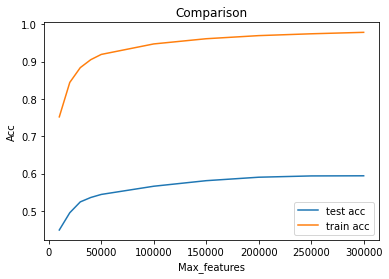

In [432]:
#Here we are testing different max_features for the 2 gram with tfidf
Options=[10000, 20000, 30000, 40000, 50000,100000,150000,200000,250000,300000]
test=[]
train=[]

for i in Options:
    
    tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(2, 2),max_features=i)
    tv_train_features = tv.fit_transform(train_corpus)

    # transform test articles into features
    tv_test_features = tv.transform(test_corpus)
    print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)

        # Naïve Bayes
    mnb = MultinomialNB(alpha=1)
    mnb.fit(tv_train_features, train_label_names)

    mnb_tfidf_train_scores = mnb.score(tv_train_features, train_label_names)


    mnb_tfidf_test_scores = mnb.score(tv_test_features, test_label_names)
    test.append(mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)

plt.plot(Options, test, label = "test acc")
plt.plot(Options, train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

TFIDF model:> Train features shape: (12831, 10000)  Test features shape: (5500, 10000)
TFIDF model:> Train features shape: (12831, 20000)  Test features shape: (5500, 20000)
TFIDF model:> Train features shape: (12831, 30000)  Test features shape: (5500, 30000)
TFIDF model:> Train features shape: (12831, 40000)  Test features shape: (5500, 40000)
TFIDF model:> Train features shape: (12831, 50000)  Test features shape: (5500, 50000)
TFIDF model:> Train features shape: (12831, 100000)  Test features shape: (5500, 100000)
TFIDF model:> Train features shape: (12831, 150000)  Test features shape: (5500, 150000)
TFIDF model:> Train features shape: (12831, 200000)  Test features shape: (5500, 200000)
TFIDF model:> Train features shape: (12831, 250000)  Test features shape: (5500, 250000)
TFIDF model:> Train features shape: (12831, 300000)  Test features shape: (5500, 300000)


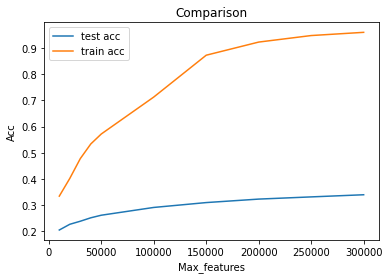

In [433]:
#Here we are testing different max_features for the 3 gram with tfidf
Options=[10000, 20000, 30000, 40000, 50000,100000,150000,200000,250000,300000]
test=[]
train=[]

for i in Options:
    
    tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(3, 3),max_features=i)
    tv_train_features = tv.fit_transform(train_corpus)

    # transform test articles into features
    tv_test_features = tv.transform(test_corpus)
    print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)

        # Naïve Bayes
    mnb = MultinomialNB(alpha=1)
    mnb.fit(tv_train_features, train_label_names)

    mnb_tfidf_train_scores = mnb.score(tv_train_features, train_label_names)


    mnb_tfidf_test_scores = mnb.score(tv_test_features, test_label_names)
    test.append(mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)

plt.plot(Options, test, label = "test acc")
plt.plot(Options, train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

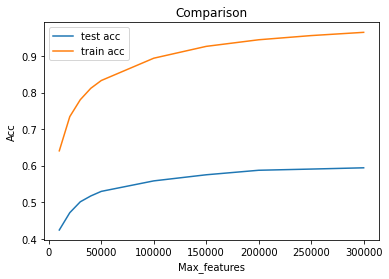

In [434]:
#Here we are testing different max_features for the 3 gram without tfidf
Options=[10000, 20000, 30000, 40000, 50000,100000,150000,200000,250000,300000]
test=[]
train=[]
for i in Options:
    cv = CountVectorizer(min_df=0.0, max_df=1.0,ngram_range=(2, 2), max_features=i)
    cv_train_features = cv.fit_transform(train_corpus)

    # transform test articles into features
    cv_test_features = cv.transform(test_corpus)
    

    mnb = MultinomialNB(alpha=1)
    mnb.fit(cv_train_features, train_label_names)

    mnb_bow_train_scores = mnb.score(cv_train_features, train_label_names)
    mnb_bow_test_scores = mnb.score(cv_test_features, test_label_names)
    test.append(mnb_bow_test_scores)
    train.append(mnb_bow_train_scores)

plt.plot(Options, test, label = "test acc")
plt.plot(Options, train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

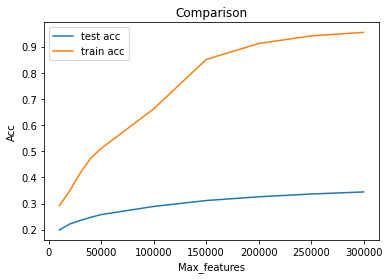

In [435]:
#Here we are testing different max_features for the 3 gram without tfidf
Options=[10000, 20000, 30000, 40000, 50000,100000,150000,200000,250000,300000]
test=[]
train=[]
for i in Options:
    cv = CountVectorizer(min_df=0.0, max_df=1.0,ngram_range=(3, 3), max_features=i)
    cv_train_features = cv.fit_transform(train_corpus)

    # transform test articles into features
    cv_test_features = cv.transform(test_corpus)
    

    mnb = MultinomialNB(alpha=1)
    mnb.fit(cv_train_features, train_label_names)

    mnb_bow_train_scores = mnb.score(cv_train_features, train_label_names)
    mnb_bow_test_scores = mnb.score(cv_test_features, test_label_names)
    test.append(mnb_bow_test_scores)
    train.append(mnb_bow_train_scores)

plt.plot(Options, test, label = "test acc")
plt.plot(Options, train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [42]:
#We can see that the model is not perforoming well and it is overfitting.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [43]:
cv_dataframe=pd.DataFrame(cv_train_features.toarray(),columns=cv.get_feature_names())
print(cv_dataframe)

       00 00 00  00 00 10  00 00 50  00 00 punisher  00 000 byron  00 000 har  \
0             0         0         0               0             0           0   
1             0         0         0               0             0           0   
2             0         0         0               0             0           0   
3             0         0         0               0             0           0   
4             0         0         0               0             0           0   
...         ...       ...       ...             ...           ...         ...   
12826         0         0         0               0             0           0   
12827         0         0         0               0             0           0   
12828         0         0         0               0             0           0   
12829         0         0         0               0             0           0   
12830         0         0         0               0             0           0   

       00 01 02  00 02 02  

TFIDF model:> Train features shape: (12831, 1000)  Test features shape: (5500, 1000)
TFIDF model:> Train features shape: (12831, 2000)  Test features shape: (5500, 2000)
TFIDF model:> Train features shape: (12831, 3000)  Test features shape: (5500, 3000)
TFIDF model:> Train features shape: (12831, 4000)  Test features shape: (5500, 4000)
TFIDF model:> Train features shape: (12831, 5000)  Test features shape: (5500, 5000)
TFIDF model:> Train features shape: (12831, 6000)  Test features shape: (5500, 6000)
TFIDF model:> Train features shape: (12831, 7000)  Test features shape: (5500, 7000)
TFIDF model:> Train features shape: (12831, 8000)  Test features shape: (5500, 8000)
TFIDF model:> Train features shape: (12831, 9000)  Test features shape: (5500, 9000)
TFIDF model:> Train features shape: (12831, 10000)  Test features shape: (5500, 10000)


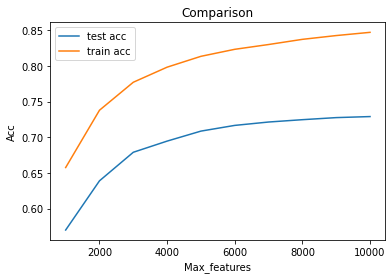

In [436]:
#Testing different max_feature with tfidf and 1 gram
Options=[1000, 2000, 3000, 4000, 5000,6000,7000,8000,9000,10000]
test=[]
train=[]

for i in Options:
    
    tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1, 1),max_features=i)
    tv_train_features = tv.fit_transform(train_corpus)

    # transform test articles into features
    tv_test_features = tv.transform(test_corpus)
    print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)

        # Naïve Bayes
    mnb = MultinomialNB(alpha=1)
    mnb.fit(tv_train_features, train_label_names)

    mnb_tfidf_train_scores = mnb.score(tv_train_features, train_label_names)


    mnb_tfidf_test_scores = mnb.score(tv_test_features, test_label_names)
    test.append(mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)

plt.plot(Options, test, label = "test acc")
plt.plot(Options, train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [45]:
cv_dataframe=pd.DataFrame(tv_train_features.toarray(),columns=tv.get_feature_names())
print(cv_dataframe)

        00  000  001   01   02  02106   03   04  040   05  ...  zip  zkm  zkn  \
0      0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   
12826  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12827  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12828  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12829  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12830  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       zombo  zone  zoom  z

# We chose to stick with tfidf and 1gram. In this section, I was trying some word2vec. Disregard it as a more in depth approach will be made in the end of the notebook

In [99]:
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names = train_test_split(np.array(data_df['Clean Article']),
                                                                                                                     np.array(data_df['Target Label']),
                                                                                                                     np.array(data_df['Target Name']),
                                                                                                                     stratify=data_df['Target Label'],
                                                                                                                     test_size=0.30, random_state=42)
train_corpus.shape, test_corpus.shape
#print(train_corpus)

((12831,), (5500,))

In [100]:
def remove_special_characters(text):
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    return text

In [101]:
re.sub(r'[0-9]+', '', remove_special_characters("122) commnet cv??"))

' commnet cv'

In [438]:
class Word2VecVectorizer:
  def __init__(self, model):
    print("Loading in word vectors...")
    self.word_vectors = model
    print("Finished loading in word vectors")

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [440]:
glove_file = datapath('C:/Users/keven/Desktop/Assignements/Assignment4/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [441]:
import time
ts = time.time()
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
te = time.time() - ts
print('training time = {0:.2f} minutes'.format(te/60))

training time = 0.58 minutes


In [102]:
# Set a word vectorizer
vectorizer = Word2VecVectorizer(model)
# Get the sentence embeddings for the train dataset
Xtrain = vectorizer.fit_transform(train_corpus)
Ytrain = train_label_names
# Get the sentence embeddings for the test dataset
Xtest = vectorizer.transform(test_corpus)
Ytest = test_label_names


Loading in word vectors...
Finished loading in word vectors
Numer of samples with no words found: 24 / 12831
Numer of samples with no words found: 7 / 5500


In [443]:
print(Xtrain.shape,Xtest.shape)

(12831, 100) (5500, 100)


In [444]:
# Support Vector Machines
svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(Xtrain, Ytrain)

Ypred = svm.predict(Xtest)
Ypred1 = svm.predict(Xtrain)

acc_test=accuracy_score(Ytest,Ypred)
acc_train=accuracy_score(Ytrain,Ypred1)
svm1=[]
svm1.append(acc_train)
svm1.append(acc_test)
svm1

[0.6273088613514145, 0.6003636363636363]

In [445]:

Log= LogisticRegression(random_state=42)
Log.fit(Xtrain,Ytrain)

Ypred = Log.predict(Xtest)
Ypred1 = Log.predict(Xtrain)

acc_test=accuracy_score(Ytest,Ypred)
acc_train=accuracy_score(Ytrain,Ypred1)
log1=[]
log1.append(acc_train)
log1.append(acc_test)
log1


[0.6279323513366066, 0.6056363636363636]

In [27]:


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(Xtrain, Ytrain)

Ypred = neigh.predict(Xtest)
Ypred1 = neigh.predict(Xtrain)

acc_test=accuracy_score(Ytest,Ypred)
acc_train=accuracy_score(Ytrain,Ypred1)
neigh1=[]
neigh1.append(acc_train)
neigh1.append(acc_test)
neigh1

NameError: name 'Xtrain' is not defined

In [27]:


clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=42)
clf.fit(Xtrain, Ytrain)
Ypred = clf.predict(Xtest)
Ypred1 = clf.predict(Xtrain)

acc_test=accuracy_score(Ytest,Ypred)
acc_train=accuracy_score(Ytrain,Ypred1)
clf1=[]
clf1.append(acc_train)
clf1.append(acc_test)
clf1



[0.9978957212999766, 0.5581818181818182]

In [29]:
clf = AdaBoostClassifier(n_estimators=300)
clf.fit(Xtrain, Ytrain)

Ypred = clf.predict(Xtest)
Ypred1=clf.predict(Xtrain)

acc_test=accuracy_score(Ytest,Ypred)
acc_train=accuracy_score(Ytrain,Ypred1)
boost=[]
boost.append(acc_train)
boost.append(acc_test)
boost

[0.3944353518821604, 0.3790909090909091]

In [30]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(Xtrain, Ytrain)

Ypred = clf.predict(Xtest)
Ypred1=clf.predict(Xtrain)

acc_test=accuracy_score(Ytest,Ypred)
acc_train=accuracy_score(Ytrain,Ypred1)
boost=[]
boost.append(acc_train)
boost.append(acc_test)
boost

[0.8500506585612969, 0.5576363636363636]

# Experimentation, max_features default

In [39]:
#Splitting the data into 60-20-20 train-val-test
X_train, X_test, y_train, y_test =train_test_split(np.array(data_df['Clean Article']), np.array(data_df['Target Name']), test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [21]:
#Here, I was trying different max features. This cell is not relevant.

# build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
tv_train_features = tv.fit_transform(X_train)

# transform test articles into features
tv_test_features = tv.transform(X_val)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)
# Naïve Bayes
mnb = MultinomialNB(alpha=1)
mnb.fit(tv_train_features, y_train)

mnb_tfidf_train_scores = mnb.score(tv_train_features, y_train)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = mnb.score(tv_test_features, y_val)
print('Val Accuracy:', mnb_tfidf_test_scores)S

TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.8881614839061648
Val Accuracy: 0.7103109656301145


TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.8881614839061648
Val Accuracy: 0.7103109656301145
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.8545190034551736
Val Accuracy: 0.696126568466994
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.831878523367885
Val Accuracy: 0.6849427168576104
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.8155119112565921
Val Accuracy: 0.6726677577741408
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.8027823240589198
Val Accuracy: 0.6647572285870158
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.792416803055101
Val Accuracy: 0.6579378068739771
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: 

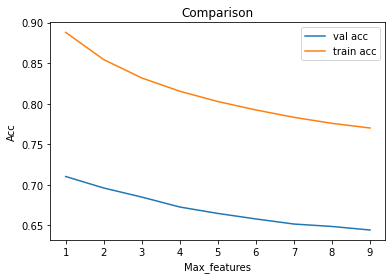

In [25]:
#Experimenting with different alpha on the validation set
train=[]
test=[]
for i in range(1,10):
    # build BOW features on train articles
    tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
    tv_train_features = tv.fit_transform(X_train)

# transform test articles into features
    tv_test_features = tv.transform(X_val)
    print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)
# Naïve Bayes
    mnb = MultinomialNB(alpha=i)
    mnb.fit(tv_train_features, y_train)

    mnb_tfidf_train_scores = mnb.score(tv_train_features, y_train)
    print('Train Accuracy:', mnb_tfidf_train_scores)

    mnb_tfidf_test_scores = mnb.score(tv_test_features, y_val)
    print('Val Accuracy:', mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)
    test.append(mnb_tfidf_test_scores)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#I will use alpha=1, I think that 88% training acc is that bad. We will check if the model did great on the test.

TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9967266775777414
Val Accuracy: 0.7588652482269503
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9978177850518276
Val Accuracy: 0.7555919258046918
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.754228041462084
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.7534097108565194
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.7515002727768685
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.7479541734860884
TFIDF model:> Train features shape: (10998, 94730)  Test features shape

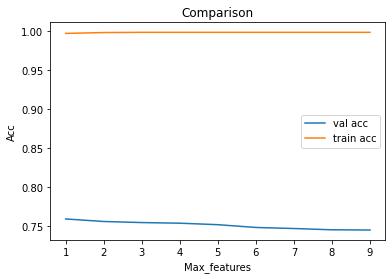

In [24]:

train=[]
test=[]
#Experimenting with different C on the validation set
for i in range(1,10):
    # build BOW features on train articles
    tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
    tv_train_features = tv.fit_transform(X_train)

# transform test articles into features
    tv_test_features = tv.transform(X_val)
    print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)
# Naïve Bayes
    svc = LinearSVC(penalty='l2', C=i, random_state=42)
    svc.fit(tv_train_features, y_train)

    mnb_tfidf_train_scores = svc.score(tv_train_features, y_train)
    print('Train Accuracy:', mnb_tfidf_train_scores)

    mnb_tfidf_test_scores = svc.score(tv_test_features, y_val)
    print('Val Accuracy:', mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)
    test.append(mnb_tfidf_test_scores)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#We will pick C=1. Lowes training and highes val accuracy

TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9979087106746681
Val Accuracy: 0.1508456082924168
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.7911438443353337
Val Accuracy: 0.12847790507364976
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.4193489725404619
Val Accuracy: 0.10229132569558101
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.3957083106019276
Val Accuracy: 0.10310965630114566
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.3587015821058374
Val Accuracy: 0.09492635024549918
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.3355155482815057
Val Accuracy: 0.09247135842880523
TFIDF model:> Train features shape: (10998, 94730)  Test features

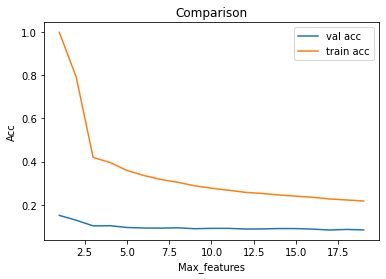

In [28]:
#Experimenting with different k on the validation set
train=[]
test=[]

for i in range(1,20):
    # build BOW features on train articles
    tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
    tv_train_features = tv.fit_transform(X_train)

# transform test articles into features
    tv_test_features = tv.transform(X_val)
    print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)
# Naïve Bayes
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(tv_train_features, y_train)

    mnb_tfidf_train_scores = neigh.score(tv_train_features, y_train)
    print('Train Accuracy:', mnb_tfidf_train_scores)

    mnb_tfidf_test_scores = neigh.score(tv_test_features, y_val)
    print('Val Accuracy:', mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)
    test.append(mnb_tfidf_test_scores)
plt.plot(list(range(1,20)), test, label = "val acc")
plt.plot(list(range(1,20)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#Model1

TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9353518821603928
Val Accuracy: 0.7667757774140753
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9204400800145481
Val Accuracy: 0.7588652482269503
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9089834515366431
Val Accuracy: 0.7520458265139116
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9011638479723586
Val Accuracy: 0.7484997272231315
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.8957083106019276
Val Accuracy: 0.7463175122749591
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.8904346244771777
Val Accuracy: 0.7430441898527005
TFIDF model:> Train features shape: (10998, 94730)  Test features shap

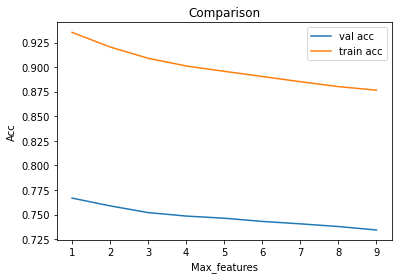

In [29]:
#Experimenting with different C on the validation set
train=[]
test=[]
for i in range(1,10):
    # build BOW features on train articles
    tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
    tv_train_features = tv.fit_transform(X_train)

# transform test articles into features
    tv_test_features = tv.transform(X_val)
    print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)
# Naïve Bayes
    mnb = ComplementNB(alpha=i)
    mnb.fit(tv_train_features, y_train)

    mnb_tfidf_train_scores = mnb.score(tv_train_features, y_train)
    print('Train Accuracy:', mnb_tfidf_train_scores)

    mnb_tfidf_test_scores = mnb.score(tv_test_features, y_val)
    print('Val Accuracy:', mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)
    test.append(mnb_tfidf_test_scores)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#Model1

TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9247135842880524
Val Accuracy: 0.7351336606655755
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9597199490816513
Val Accuracy: 0.7452264048008729
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9755410074559011
Val Accuracy: 0.7506819421713039
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9826332060374614
Val Accuracy: 0.7528641571194763
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9873613384251683
Val Accuracy: 0.7555919258046918
TFIDF model:> Train features shape: (10998, 94730)  Test features shape: (3666, 94730)
Train Accuracy: 0.9901800327332242
Val Accuracy: 0.756683033278778
TFIDF model:> Train features shape: (10998, 94730)  Test features shape

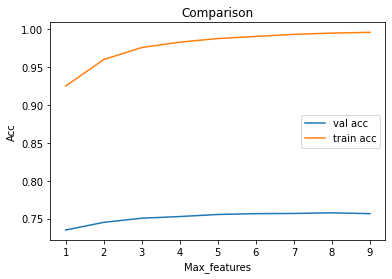

In [31]:
#Experimenting with different C on the validation.
train=[]
test=[]

for i in range(1,10):
    # build BOW features on train articles
    tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
    tv_train_features = tv.fit_transform(X_train)

# transform test articles into features
    tv_test_features = tv.transform(X_val)
    print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)
# Naïve Bayes
    lg = LogisticRegression(random_state=42,C=i)
    lg.fit(tv_train_features, y_train)

    mnb_tfidf_train_scores = lg.score(tv_train_features, y_train)
    print('Train Accuracy:', mnb_tfidf_train_scores)

    mnb_tfidf_test_scores = lg.score(tv_test_features, y_val)
    print('Val Accuracy:', mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)
    test.append(mnb_tfidf_test_scores)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

# max_features=5000, I did the same as befor but using max_features equal to 5000.

In [41]:
 # build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0,max_features=5000)
tv_train_features = tv.fit_transform(X_train)
# transform test articles into features
tv_test_features = tv.transform(X_val)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (10998, 5000)  Test features shape: (3666, 5000)


Train Accuracy: 0.817603200581924
Val Accuracy: 0.6863066012002182
Train Accuracy: 0.7955082742316785
Val Accuracy: 0.6762138570649209
Train Accuracy: 0.7801418439716312
Val Accuracy: 0.668303327877796
Train Accuracy: 0.7694126204764503
Val Accuracy: 0.6642116748499727
Train Accuracy: 0.7605019094380796
Val Accuracy: 0.6587561374795418
Train Accuracy: 0.7527732314966358
Val Accuracy: 0.6533006001091107
Train Accuracy: 0.7454082560465539
Val Accuracy: 0.6500272776868522
Train Accuracy: 0.7390434624477178
Val Accuracy: 0.646481178396072
Train Accuracy: 0.7335879250772868
Val Accuracy: 0.6437534097108565


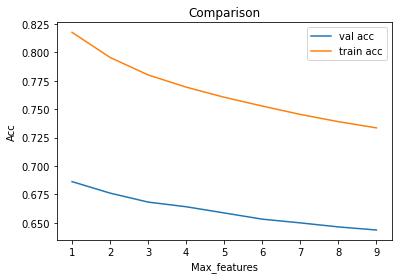

In [42]:
train=[]
test=[]
for i in range(1,10):

# Naïve Bayes
    mnb = MultinomialNB(alpha=i)
    mnb.fit(tv_train_features, y_train)

    mnb_tfidf_train_scores = mnb.score(tv_train_features, y_train)
    print('Train Accuracy:', mnb_tfidf_train_scores)

    mnb_tfidf_test_scores = mnb.score(tv_test_features, y_val)
    print('Val Accuracy:', mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)
    test.append(mnb_tfidf_test_scores)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#Model1

Train Accuracy: 0.9823604291689398
Val Accuracy: 0.6849427168576104
Train Accuracy: 0.9935442807783234
Val Accuracy: 0.67430441898527
Train Accuracy: 0.9951809419894526
Val Accuracy: 0.6639388979814512
Train Accuracy: 0.9958174213493363
Val Accuracy: 0.6560283687943262
Train Accuracy: 0.9960901982178578
Val Accuracy: 0.6522094926350246
Train Accuracy: 0.9960901982178578
Val Accuracy: 0.6486633933442444
Train Accuracy: 0.9960901982178578
Val Accuracy: 0.6467539552645936
Train Accuracy: 0.9960901982178578
Val Accuracy: 0.6467539552645936
Train Accuracy: 0.9960901982178578
Val Accuracy: 0.644026186579378


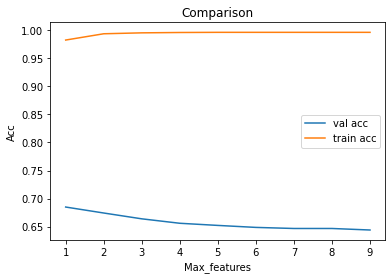

In [43]:
train=[]
test=[]
for i in range(1,10):

# Naïve Bayes
    svc = LinearSVC(penalty='l2', C=i, random_state=42)
    svc.fit(tv_train_features, y_train)

    mnb_tfidf_train_scores = svc.score(tv_train_features, y_train)
    print('Train Accuracy:', mnb_tfidf_train_scores)

    mnb_tfidf_test_scores = svc.score(tv_test_features, y_val)
    print('Val Accuracy:', mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)
    test.append(mnb_tfidf_test_scores)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#Model1

Train Accuracy: 0.9954537188579742
Val Accuracy: 0.17648663393344244
Train Accuracy: 0.7930532824149845
Val Accuracy: 0.16503000545553737
Train Accuracy: 0.2026732133115112
Val Accuracy: 0.1099290780141844
Train Accuracy: 0.3900709219858156
Val Accuracy: 0.12165848336061102
Train Accuracy: 0.3471540280050918
Val Accuracy: 0.11429350791052918
Train Accuracy: 0.3108747044917258
Val Accuracy: 0.10856519367157665
Train Accuracy: 0.2866884888161484
Val Accuracy: 0.1033824331696672
Train Accuracy: 0.26977632296781234
Val Accuracy: 0.10201854882705946
Train Accuracy: 0.25377341334788145
Val Accuracy: 0.09765411893071467
Train Accuracy: 0.23558828877977814
Val Accuracy: 0.09492635024549918
Train Accuracy: 0.22004000727404982
Val Accuracy: 0.09110747408619749
Train Accuracy: 0.2050372795053646
Val Accuracy: 0.08810692853246045
Train Accuracy: 0.19376250227314057
Val Accuracy: 0.09110747408619749
Train Accuracy: 0.18466993998908893
Val Accuracy: 0.09110747408619749
Train Accuracy: 0.172304055282

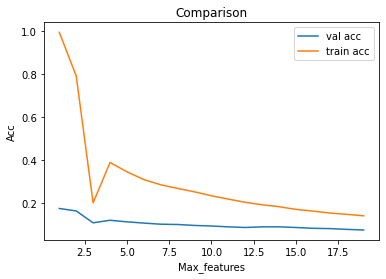

In [44]:
train=[]
test=[]
for i in range(1,20):

# Naïve Bayes
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(tv_train_features, y_train)

    mnb_tfidf_train_scores = neigh.score(tv_train_features, y_train)
    print('Train Accuracy:', mnb_tfidf_train_scores)

    mnb_tfidf_test_scores = neigh.score(tv_test_features, y_val)
    print('Val Accuracy:', mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)
    test.append(mnb_tfidf_test_scores)
plt.plot(list(range(1,20)), test, label = "val acc")
plt.plot(list(range(1,20)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#Model1

Train Accuracy: 0.7865975631933079
Val Accuracy: 0.6944899072558647
Train Accuracy: 0.7865975631933079
Val Accuracy: 0.6944899072558647
Train Accuracy: 0.7864157119476268
Val Accuracy: 0.6923076923076923
Train Accuracy: 0.7865975631933079
Val Accuracy: 0.6933987997817785
Train Accuracy: 0.7853246044735407
Val Accuracy: 0.6942171303873431
Train Accuracy: 0.7839607201309329
Val Accuracy: 0.6936715766503001
Train Accuracy: 0.7828696126568467
Val Accuracy: 0.6923076923076923
Train Accuracy: 0.7815057283142389
Val Accuracy: 0.6923076923076923
Train Accuracy: 0.7798690671031097
Val Accuracy: 0.6893071467539552


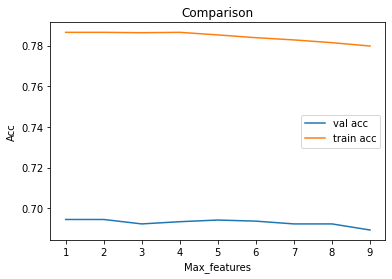

In [45]:
train=[]
test=[]

for i in range(1,10):

# Naïve Bayes
    mnb = ComplementNB(alpha=i)
    mnb.fit(tv_train_features, y_train)

    mnb_tfidf_train_scores = mnb.score(tv_train_features, y_train)
    print('Train Accuracy:', mnb_tfidf_train_scores)

    mnb_tfidf_test_scores = mnb.score(tv_test_features, y_val)
    print('Val Accuracy:', mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)
    test.append(mnb_tfidf_test_scores)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#Model1

Train Accuracy: 0.8614293507910529
Val Accuracy: 0.6974904528096018
Train Accuracy: 0.9050736497545008
Val Accuracy: 0.6977632296781233
Train Accuracy: 0.9305328241498454
Val Accuracy: 0.6996726677577741
Train Accuracy: 0.9480814693580651
Val Accuracy: 0.6977632296781233
Train Accuracy: 0.9580832878705219
Val Accuracy: 0.6963993453355155
Train Accuracy: 0.9650845608292417
Val Accuracy: 0.6953082378614294
Train Accuracy: 0.9692671394799054
Val Accuracy: 0.6936715766503001
Train Accuracy: 0.9740861974904528
Val Accuracy: 0.6912165848336062
Train Accuracy: 0.9769958174213493
Val Accuracy: 0.6903982542280415


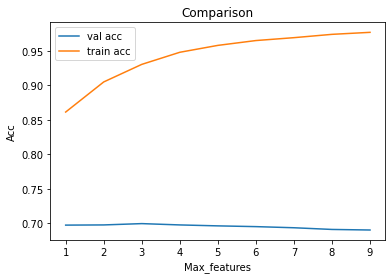

In [46]:
train=[]
test=[]

for i in range(1,10):
# Naïve Bayes
    lg = LogisticRegression(random_state=42,C=i)
    lg.fit(tv_train_features, y_train)

    mnb_tfidf_train_scores = lg.score(tv_train_features, y_train)
    print('Train Accuracy:', mnb_tfidf_train_scores)

    mnb_tfidf_test_scores = lg.score(tv_test_features, y_val)
    print('Val Accuracy:', mnb_tfidf_test_scores)
    train.append(mnb_tfidf_train_scores)
    test.append(mnb_tfidf_test_scores)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

# I decided not to not go with max_train=5000. I am going to train on the validation and train and then test on the model, after choosing the best parameter.

In [40]:
#We combined training and valid to tested on the testing set. This is the naive bayes model.
X_Comb1=np.concatenate((X_train, X_val))
Y_Comb1=np.concatenate((y_train,y_val))

tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
tv_train_features = tv.fit_transform(X_Comb1)

# transform test articles into features
tv_test_features = tv.transform(X_test)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Test features shape:', tv_test_features.shape)
# Naïve Bayes
mnb = MultinomialNB(alpha=1)
mnb.fit(tv_train_features, Y_Comb1)

mnb_tfidf_train_scores = mnb.score(tv_train_features, Y_Comb1)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = mnb.score(tv_test_features, y_test)
print('test Accuracy:', mnb_tfidf_test_scores)
train.append(mnb_tfidf_train_scores)
test.append(mnb_tfidf_test_scores)


TFIDF model:> Train features shape: (14664, 112462)  Test features shape: (3667, 112462)
Train Accuracy: 0.8737043098745226
test Accuracy: 0.7365694027815654


In [58]:
#We combined training and valid to tested on the testing set. This is the SVM model.
svc = LinearSVC(penalty='l2', C=1, random_state=42)
svc.fit(tv_train_features, Y_Comb1)

mnb_tfidf_train_scores = svc.score(tv_train_features, Y_Comb1)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = svc.score(tv_test_features, y_test)
print('test Accuracy:', mnb_tfidf_test_scores)
train.append(mnb_tfidf_train_scores)
test.append(mnb_tfidf_test_scores)

Train Accuracy: 0.9956355701036552
test Accuracy: 0.791655304063267


In [63]:
#We combined training and valid to tested on the testing set. This is the naive model.
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(tv_train_features, Y_Comb1)

mnb_tfidf_train_scores = neigh.score(tv_train_features, Y_Comb1)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = neigh.score(tv_test_features, y_test)
print('Val Accuracy:', mnb_tfidf_test_scores)
train.append(mnb_tfidf_train_scores)
test.append(mnb_tfidf_test_scores)



Train Accuracy: 0.3706355701036552
Val Accuracy: 0.10389964548677393


In [64]:
#We combined training and valid to tested on the testing set. This is the Complement NB with alph=1 model.
mnb = ComplementNB(alpha=1)
mnb.fit(tv_train_features, Y_Comb1)

mnb_tfidf_train_scores = mnb.score(tv_train_features, Y_Comb1)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = mnb.score(tv_test_features, y_test)
print('Val Accuracy:', mnb_tfidf_test_scores)
train.append(mnb_tfidf_train_scores)
test.append(mnb_tfidf_test_scores)

Train Accuracy: 0.9241680305510093
Val Accuracy: 0.7897463866921189


In [42]:
#We combined training and valid to tested on the testing set. This is the Complement NB with alpha=10 model.
mnb = ComplementNB(alpha=9)
mnb.fit(tv_train_features, Y_Comb1)

mnb_tfidf_train_scores = mnb.score(tv_train_features, Y_Comb1)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = mnb.score(tv_test_features, y_test)
print('Val Accuracy:', mnb_tfidf_test_scores)
train.append(mnb_tfidf_train_scores)
test.append(mnb_tfidf_test_scores)

Train Accuracy: 0.8630660120021822
Val Accuracy: 0.7553858740114535


In [66]:
#We combined training and valid to tested on the testing set. This is the Logistic model with c=1
lg = LogisticRegression(random_state=42,C=1)
lg.fit(tv_train_features, Y_Comb1)

mnb_tfidf_train_scores = lg.score(tv_train_features, Y_Comb1)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = lg.score(tv_test_features, y_test)
print('Val Accuracy:', mnb_tfidf_test_scores)
train.append(mnb_tfidf_train_scores)
test.append(mnb_tfidf_test_scores)

Train Accuracy: 0.9186442989634479
Val Accuracy: 0.7692937005726752


In [41]:
#We combined training and valid to tested on the testing set. This is the Logistic model with c=9

lg = LogisticRegression(random_state=42,C=8)
lg.fit(tv_train_features, Y_Comb1)

mnb_tfidf_train_scores = lg.score(tv_train_features, Y_Comb1)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = lg.score(tv_test_features, y_test)
print('Val Accuracy:', mnb_tfidf_test_scores)
train.append(mnb_tfidf_train_scores)
test.append(mnb_tfidf_test_scores)


Train Accuracy: 0.9916803055100928
Val Accuracy: 0.7829288246523043


# Here, we will do Glove and build our model upon them.

In [43]:
#Here, we decided to toggle on all the data preprocessing
norm_corpus = normalize_corpus(corpus=data_df['Article'], html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=False,stemsentence=False, special_char_removal=True, 
                     stopword_removal=True)
data_df['Clean Article'] = norm_corpus

In [44]:
#Splitting the data
X_train, X_test, y_train, y_test =train_test_split(np.array(data_df['Clean Article']), np.array(data_df['Target Name']), test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [45]:
#This class will allow us to compute the mean of the vectors values. More details on the PDF document.
class Word2VecVectorizer:
  def __init__(self, model):
    print("Loading in word vectors...")
    self.word_vectors = model
    print("Finished loading in word vectors")

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [46]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [47]:
glove_file = datapath('C:/Users/keven/Desktop/Assignements/Assignment4/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [48]:
#Training the glove model

ts = time.time()
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
te = time.time() - ts
print('training time = {0:.2f} minutes'.format(te/60))

training time = 0.60 minutes


In [49]:
# Set a word vectorizer
vectorizer = Word2VecVectorizer(model)
# Get the sentence embeddings for the train dataset
X_train = vectorizer.transform(X_train)
y_train = y_train
# Get the sentence embeddings for the validation dataset
X_val = vectorizer.transform(X_val)
y_val = y_val
#Get the senetence embeddings for test
X_test=vectorizer.transform(X_test)
y_test=y_test




Loading in word vectors...
Finished loading in word vectors
Numer of samples with no words found: 19 / 10998
Numer of samples with no words found: 8 / 3666
Numer of samples with no words found: 4 / 3667


In [121]:
# Support Vector Machines
from sklearn.svm import LinearSVC
svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(X_train, y_train)

Ypred = svm.predict(X_val)
Ypred1 = svm.predict(X_train)
from sklearn.metrics import accuracy_score

acc_test=accuracy_score(y_val,Ypred)
acc_train=accuracy_score(y_train,Ypred1)
svm1=[]
svm1.append(acc_train)
svm1.append(acc_test)
svm1

[0.6276595744680851, 0.591380250954719]

In [116]:
# Support Vector Machines
from sklearn.svm import LinearSVC
svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(X_train, y_train)

Ypred = svm.predict(X_val)
Ypred1 = svm.predict(X_train)
from sklearn.metrics import accuracy_score

acc_test=accuracy_score(y_val,Ypred)
acc_train=accuracy_score(y_train,Ypred1)
svm1=[]
svm1.append(acc_train)
svm1.append(acc_test)
svm1

[0.6317512274959084, 0.5987452264048009]

In [125]:
# Support Vector Machines
from sklearn.svm import LinearSVC
svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(X_train, y_train)

Ypred = svm.predict(X_val)
Ypred1 = svm.predict(X_train)
from sklearn.metrics import accuracy_score

acc_test=accuracy_score(y_val,Ypred)
acc_train=accuracy_score(y_train,Ypred1)
svm1=[]
svm1.append(acc_train)
svm1.append(acc_test)
svm1

[0.6317512274959084, 0.5987452264048009]

# Testing Word2vec. In this section, we went with the same idea of testing parameter on validation set. We did not inlclude the naive bayes because there are negative values

Train Accuracy: 0.6317512274959084
Val Accuracy: 0.5987452264048009
Train Accuracy: 0.6312056737588653
Val Accuracy: 0.599290780141844
Train Accuracy: 0.6308419712675032
Val Accuracy: 0.5987452264048009
Train Accuracy: 0.6310238225131842
Val Accuracy: 0.5981996726677578
Train Accuracy: 0.6310238225131842
Val Accuracy: 0.5981996726677578
Train Accuracy: 0.6314784506273868
Val Accuracy: 0.5979268957992362
Train Accuracy: 0.6309328968903437
Val Accuracy: 0.5976541189307146
Train Accuracy: 0.6309328968903437
Val Accuracy: 0.5976541189307146
Train Accuracy: 0.6311147481360248
Val Accuracy: 0.5976541189307146


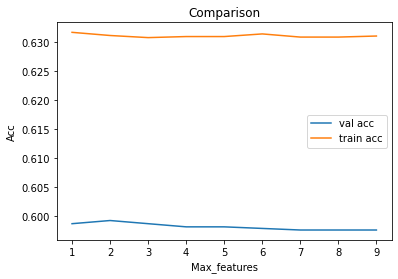

In [127]:
#Linear SVM
train=[]
test=[]
for i in range(1,10):
    svm = LinearSVC(penalty='l2', C=i, random_state=42)
    svm.fit(X_train, y_train)
    
    Ypred = svm.predict(X_val)
    Ypred1 = svm.predict(X_train)
    
    acc_test=accuracy_score(y_val,Ypred)
    acc_train=accuracy_score(y_train,Ypred1)
   
    print('Train Accuracy:', acc_train)
    print('Val Accuracy:', acc_test)
    train.append(acc_train)
    test.append(acc_test)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#I will use alpha=1, I think that 88% training acc is that bad. We will check if the model did great on the test

Train Accuracy: 0.6354791780323695
Val Accuracy: 0.607746863066012
Train Accuracy: 0.638025095471904
Val Accuracy: 0.6063829787234043
Train Accuracy: 0.6389343517003091
Val Accuracy: 0.6055646481178396
Train Accuracy: 0.6386615748317876
Val Accuracy: 0.6061102018548827
Train Accuracy: 0.6391162029459901
Val Accuracy: 0.6050190943807965
Train Accuracy: 0.6392980541916712
Val Accuracy: 0.605291871249318
Train Accuracy: 0.6396617566830333
Val Accuracy: 0.605291871249318
Train Accuracy: 0.6399345335515548
Val Accuracy: 0.605291871249318
Train Accuracy: 0.6401163847972359
Val Accuracy: 0.6044735406437534


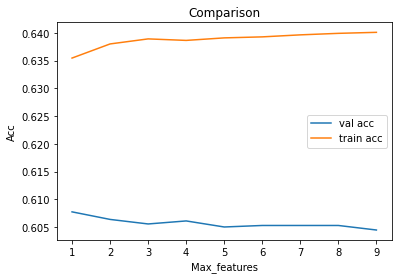

In [131]:
#Logistic Regression
train=[]
test=[]
for i in range(1,10):
    Log= LogisticRegression(random_state=42,C=i)
    Log.fit(X_train,y_train)

    Ypred = Log.predict(X_val)
    Ypred1 = Log.predict(X_train)
    
    acc_test=accuracy_score(y_val,Ypred)
    acc_train=accuracy_score(y_train,Ypred1)
   
    print('Train Accuracy:', acc_train)
    print('Val Accuracy:', acc_test)
    train.append(acc_train)
    test.append(acc_test)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#I will use alpha=1, I think that 88% training acc is that bad. We will check if the model did great on the test

Train Accuracy: 0.9979996362975087
Val Accuracy: 0.5073649754500819
Train Accuracy: 0.7664120749227132
Val Accuracy: 0.4839061647572286
Train Accuracy: 0.7280414620840153
Val Accuracy: 0.5032733224222586
Train Accuracy: 0.6951263866157483
Val Accuracy: 0.5141843971631206
Train Accuracy: 0.6788507001272959
Val Accuracy: 0.5291871249318058
Train Accuracy: 0.6645753773413348
Val Accuracy: 0.5300054555373704
Train Accuracy: 0.6559374431714857
Val Accuracy: 0.5340971085651937
Train Accuracy: 0.6477541371158393
Val Accuracy: 0.53873431533006
Train Accuracy: 0.643116930350973
Val Accuracy: 0.5395526459356247
Train Accuracy: 0.6347517730496454
Val Accuracy: 0.541189307146754
Train Accuracy: 0.6298417894162575
Val Accuracy: 0.5403709765411893
Train Accuracy: 0.6248408801600291
Val Accuracy: 0.5376432078559739
Train Accuracy: 0.6205673758865248
Val Accuracy: 0.5373704309874523
Train Accuracy: 0.6154755410074559
Val Accuracy: 0.5368248772504092
Train Accuracy: 0.6109292598654301
Val Accuracy: 0.5

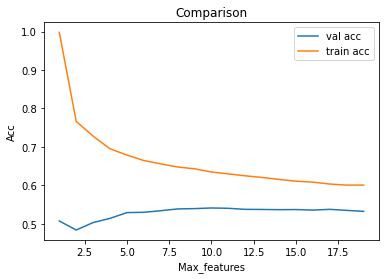

In [137]:
#KNN
train=[]
test=[]
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    Ypred = neigh.predict(X_val)
    Ypred1 = neigh.predict(X_train)
    
    acc_test=accuracy_score(y_val,Ypred)
    acc_train=accuracy_score(y_train,Ypred1)
   
    print('Train Accuracy:', acc_train)
    print('Val Accuracy:', acc_test)
    train.append(acc_train)
    test.append(acc_test)
plt.plot(list(range(1,20)), test, label = "val acc")
plt.plot(list(range(1,20)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#I will use alpha=1, I think that 88% training acc is that bad. We will check if the model did great on the test

Train Accuracy: 0.6317512274959084
Val Accuracy: 0.5987452264048009
Train Accuracy: 0.6312056737588653
Val Accuracy: 0.599290780141844
Train Accuracy: 0.6308419712675032
Val Accuracy: 0.5987452264048009
Train Accuracy: 0.6310238225131842
Val Accuracy: 0.5981996726677578
Train Accuracy: 0.6310238225131842
Val Accuracy: 0.5981996726677578
Train Accuracy: 0.6314784506273868
Val Accuracy: 0.5979268957992362
Train Accuracy: 0.6309328968903437
Val Accuracy: 0.5976541189307146
Train Accuracy: 0.6309328968903437
Val Accuracy: 0.5976541189307146
Train Accuracy: 0.6311147481360248
Val Accuracy: 0.5976541189307146


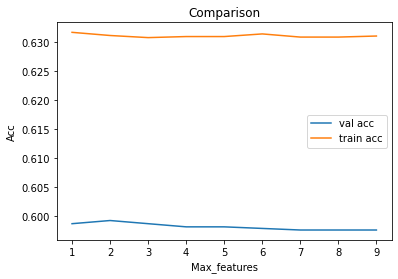

In [133]:
train=[]
test=[]
for i in range(1,10):
    svm = LinearSVC(penalty='l2', C=i, random_state=42)
    svm.fit(X_train, y_train)
    
    Ypred = svm.predict(X_val)
    Ypred1 = svm.predict(X_train)
    
    acc_test=accuracy_score(y_val,Ypred)
    acc_train=accuracy_score(y_train,Ypred1)
   
    print('Train Accuracy:', acc_train)
    print('Val Accuracy:', acc_test)
    train.append(acc_train)
    test.append(acc_test)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#I will use alpha=1, I think that 88% training acc is that bad. We will check if the model did great on the test

Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5400981996726678
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5515548281505729
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5624659028914348
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5638297872340425
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5725586470267321
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5717403164211675
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5709219858156028
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5725586470267321
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5692853246044736


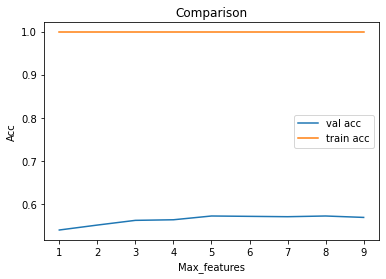

In [134]:


#Random Forest

train=[]
test=[]
for i in range(100,1000,100):
    clf = RandomForestClassifier(n_estimators=i, max_features="auto",random_state=42)
    clf.fit(X_train, y_train)
    
    Ypred = clf.predict(X_val)
    Ypred1 = clf.predict(X_train)
    
    acc_test=accuracy_score(y_val,Ypred)
    acc_train=accuracy_score(y_train,Ypred1)
   
    print('Train Accuracy:', acc_train)
    print('Val Accuracy:', acc_test)
    train.append(acc_train)
    test.append(acc_test)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#I will use alpha=1, I think that 88% training acc is that bad. We will check if the model did great on the test


Train Accuracy: 0.3557010365521004
Val Accuracy: 0.3415166393889798
Train Accuracy: 0.37115839243498816
Val Accuracy: 0.3537915984724495
Train Accuracy: 0.38352427714129844
Val Accuracy: 0.36033824331696673
Train Accuracy: 0.3960720130932897
Val Accuracy: 0.36715766503000546
Train Accuracy: 0.3988907074013457
Val Accuracy: 0.36770321876704853
Train Accuracy: 0.4098017821422077
Val Accuracy: 0.37206764866339337
Train Accuracy: 0.41225677395890165
Val Accuracy: 0.3769776322967812
Train Accuracy: 0.4131660301873068
Val Accuracy: 0.37752318603382434
Train Accuracy: 0.41671212947808695
Val Accuracy: 0.381342062193126


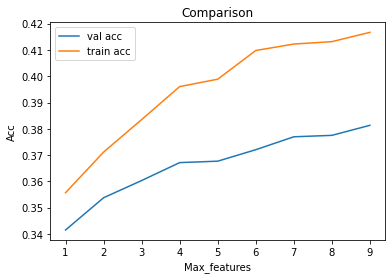

In [135]:
train=[]
test=[]
#Adaptive boosting
for i in range(100,1000,100):
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    
    Ypred = clf.predict(X_val)
    Ypred1 = clf.predict(X_train)
    
    acc_test=accuracy_score(y_val,Ypred)
    acc_train=accuracy_score(y_train,Ypred1)
   
    print('Train Accuracy:', acc_train)
    print('Val Accuracy:', acc_test)
    train.append(acc_train)
    test.append(acc_test)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#I will use alpha=1, I think that 88% training acc is that bad. We will check if the model did great on the test



Train Accuracy: 0.8778868885251864
Val Accuracy: 0.5490998363338789
Train Accuracy: 0.9755410074559011
Val Accuracy: 0.5654664484451718
Train Accuracy: 0.9967266775777414
Val Accuracy: 0.5681942171303873
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5720130932896891
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5728314238952537
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5771958537915984
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.5815602836879432
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.57746863066012
Train Accuracy: 0.9980905619203492
Val Accuracy: 0.57746863066012


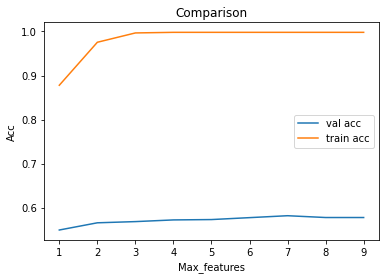

In [136]:
train=[]
test=[]
#Gradient Boosting
for i in range(100,1000,100):
    clf = GradientBoostingClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    
    Ypred = clf.predict(X_val)
    Ypred1 = clf.predict(X_train)
    
    acc_test=accuracy_score(y_val,Ypred)
    acc_train=accuracy_score(y_train,Ypred1)
   
    print('Train Accuracy:', acc_train)
    print('Val Accuracy:', acc_test)
    train.append(acc_train)
    test.append(acc_test)
plt.plot(list(range(1,10)), test, label = "val acc")
plt.plot(list(range(1,10)), train, label = "train acc")
plt.xlabel('Max_features')
# Set the y axis label of the current axis.
plt.ylabel('Acc')
# Set a title of the current axes.
plt.title('Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#I will use alpha=1, I think that 88% training acc is that bad. We will check if the model did great on the test

# After choosing the best parameter we will be testing on the testing set 

In [45]:

#We cmobined training and valid to tested on the training
X_Comb1=np.concatenate((X_train, X_val))
Y_Comb1=np.concatenate((y_train,y_val))

svm = LinearSVC(penalty='l2', C=2, random_state=42)
svm.fit(X_Comb1, Y_Comb1)
    
Ypred = svm.predict(X_test)
Ypred1 = svm.predict(X_Comb1)
    
acc_test=accuracy_score(y_test,Ypred)
acc_train=accuracy_score(Y_Comb1,Ypred1)
   
print('Train Accuracy:', acc_train)
print('Val Accuracy:', acc_test)

Train Accuracy: 0.6252727768685216
Val Accuracy: 0.6064903190619034


In [48]:
#We cmobined training and valid to tested on the training
X_Comb1=np.concatenate((X_train, X_val))
Y_Comb1=np.concatenate((y_train,y_val))

neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(X_Comb1, Y_Comb1)
    
Ypred = neigh.predict(X_test)
Ypred1 = neigh.predict(X_Comb1)
    
acc_test=accuracy_score(y_test,Ypred)
acc_train=accuracy_score(Y_Comb1,Ypred1)
   
print('Train Accuracy:', acc_train)
print('Val Accuracy:', acc_test)

Train Accuracy: 0.6153846153846154
Val Accuracy: 0.5584946823016089


In [49]:
#We cmobined training and valid to tested on the training
X_Comb1=np.concatenate((X_train, X_val))
Y_Comb1=np.concatenate((y_train,y_val))

clf = RandomForestClassifier(n_estimators=800, max_features="auto",random_state=42)
clf.fit(X_Comb1, Y_Comb1)
    
Ypred = clf.predict(X_test)
Ypred1 = clf.predict(X_Comb1)
    
acc_test=accuracy_score(y_test,Ypred)
acc_train=accuracy_score(Y_Comb1,Ypred1)
   
print('Train Accuracy:', acc_train)
print('Val Accuracy:', acc_test)

Train Accuracy: 0.9977495908346972
Val Accuracy: 0.5849468230160895


In [50]:
X_Comb1=np.concatenate((X_train, X_val))
Y_Comb1=np.concatenate((y_train,y_val))

clf = AdaBoostClassifier(n_estimators=900)
clf.fit(X_Comb1, Y_Comb1)
    
Ypred = clf.predict(X_test)
Ypred1 = clf.predict(X_Comb1)
    
acc_test=accuracy_score(y_test,Ypred)
acc_train=accuracy_score(Y_Comb1,Ypred1)
   
print('Train Accuracy:', acc_train)
print('Val Accuracy:', acc_test)

Train Accuracy: 0.42539552645935624
Val Accuracy: 0.395145895827652


In [52]:
X_Comb1=np.concatenate((X_train, X_val))
Y_Comb1=np.concatenate((y_train,y_val))

clf = GradientBoostingClassifier(n_estimators=700)
clf.fit(X_Comb1, Y_Comb1)
    
Ypred = clf.predict(X_test)
Ypred1 = clf.predict(X_Comb1)
    
acc_test=accuracy_score(y_test,Ypred)
acc_train=accuracy_score(Y_Comb1,Ypred1)
   
print('Train Accuracy:', acc_train)
print('Val Accuracy:', acc_test)

Train Accuracy: 0.9977495908346972
Val Accuracy: 0.6086719389146441


In [54]:
X_Comb1=np.concatenate((X_train, X_val))
Y_Comb1=np.concatenate((y_train,y_val))

Log= LogisticRegression(random_state=42,C=1)
Log.fit(X_Comb1, Y_Comb1)
    
Ypred = Log.predict(X_test)
Ypred1 = Log.predict(X_Comb1)
    
acc_test=accuracy_score(y_test,Ypred)
acc_train=accuracy_score(Y_Comb1,Ypred1)
   
print('Train Accuracy:', acc_train)
print('Val Accuracy:', acc_test)

Train Accuracy: 0.6340016366612111
Val Accuracy: 0.6119443686937551


In [22]:
mnb_tfidf_train_scores = svclassifier.score(tv_train_features, y_train)
print('Train Accuracy:', mnb_tfidf_train_scores)

mnb_tfidf_test_scores = svclassifier.score(tv_test_features, y_val)
print('Val Accuracy:', mnb_tfidf_test_scores)

Train Accuracy: 0.054373522458628844
Val Accuracy: 0.050463720676486634
